# First run of python code 

1.[Importing libraries to start wrangling and plotting](#1.Importing-libraries-to-start-wrangling-and-plotting)  
2.[Import data](#2.Import-data)  
3.[Start cleaning](#3.Start-cleaning)

## 1.Importing libraries to start wrangling and plotting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
%matplotlib inline
#We use matplotlib inline to store the graphs generated in the jupyter notebook
import warnings
warnings.filterwarnings('ignore')
#When wrangling a pandas shows several warning for methods that will be out of the package in the future, 
#and when overwriting the columns. 

## 2.Import data

In [2]:
data = pd.read_csv('C:/Users/asomm/Desktop/Iron-bcamp/Case-Study-Regression/data/regression_data.csv',
                   names = ['id','date_sold','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors',
                           'waterfront','view','cond','grade','sqft_above','sqft_basement','yr_built',
                           'yr_renovated','zipcode','latitude','longitude','sqft_living15','sqft_lot15','price'])

In [3]:
data

,id,date_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,cond,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date_sold      21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   cond           21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  latitude       21597 non-null  float64
 17  longitude      21597 non-null  float64
 18  sqft_l

## 3.Start cleaning
We will start by preparing the data to export, to be used later in Tableau, setting dtypes, and creating new columns with better information to be plotted. 
Happily we do not have any null values, so we can jump directly into removing duplicates, checking the data types, and see if there are any spelling errors, or input errors in our data. 
* let's first check for duplicated rows 

In [5]:
sum(data.duplicated())

0

* We start with setting the date_sold column into a datetime series 

In [6]:
data['date_sold'] = pd.to_datetime(data['date_sold'])

In [7]:
data['date_sold'].loc[4]

Timestamp('2015-02-18 00:00:00')

* We can loop over the columns value counts() to further explore other columns:

In [8]:
for col in data.columns:
    print ('\n------'+col+'------\n')
    print(data[col].value_counts())


------id------

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

------date_sold------

2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-05-17      1
2014-07-27      1
2014-08-03      1
2014-11-02      1
2015-05-24      1
Name: date_sold, Length: 372, dtype: int64

------bedrooms------

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

------bathrooms------

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50      

* We can see there are duplicated IDs, let's find out why. 

In [9]:
data['id'].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [10]:
data[data['id']==795000620]

,id,date_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,cond,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


These three listings indicate that the same house has been sold three times with different prices, so we will keep these duplicates, as it adds up value to the prediction we will want to calculate later. 

* Then we can look into why the number of floors of the property is a float. 

In [11]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Seeing that half floors are common, we leave it as it is. Later we could put turn this data to categorical, as more floors don't necessarily mean the property is better, as many people value the house to be at floor level.  

We don't see any more corrupted data, there might be indeed outliers, but we will deal with them either in our Tableau visualizations, or later while doing the wrangling and preprocessing for the regression models. 

### More cleaning to prepare for models application
* Removing outliers from numerical categories

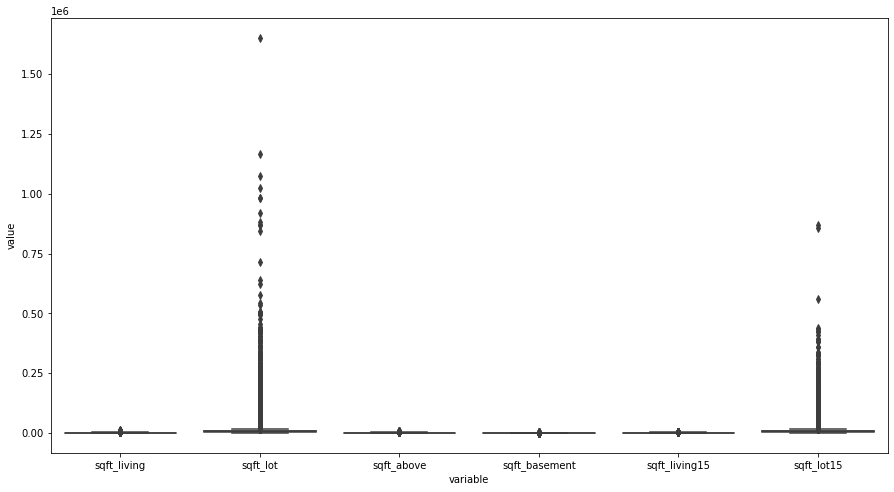

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]));

In [13]:
data.shape

(21597, 21)

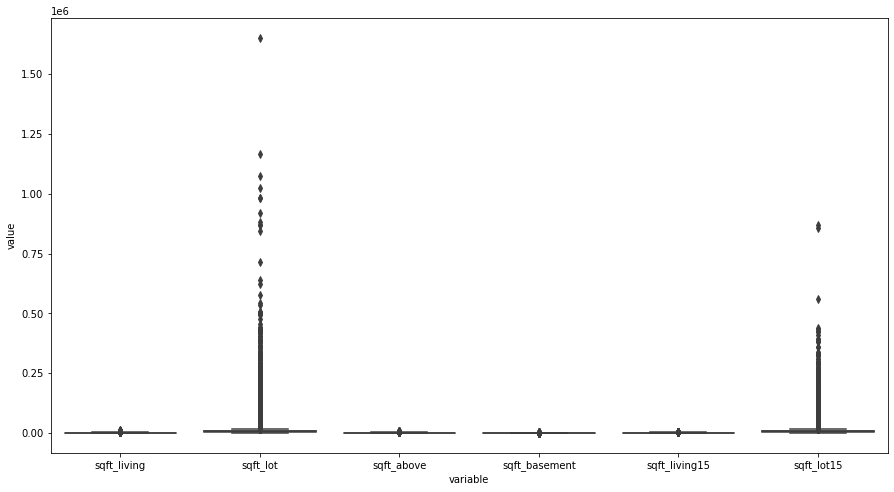

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]));

In [15]:
data = data.reset_index(drop=True)

 ### * At this point we can export the data to create visualizations in tableau. 

In [16]:
data.to_csv("C:/Users/asomm/Desktop/Iron-bcamp/Case-Study-Regression/tableau/export_ready_tableau.csv")

## EDA

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

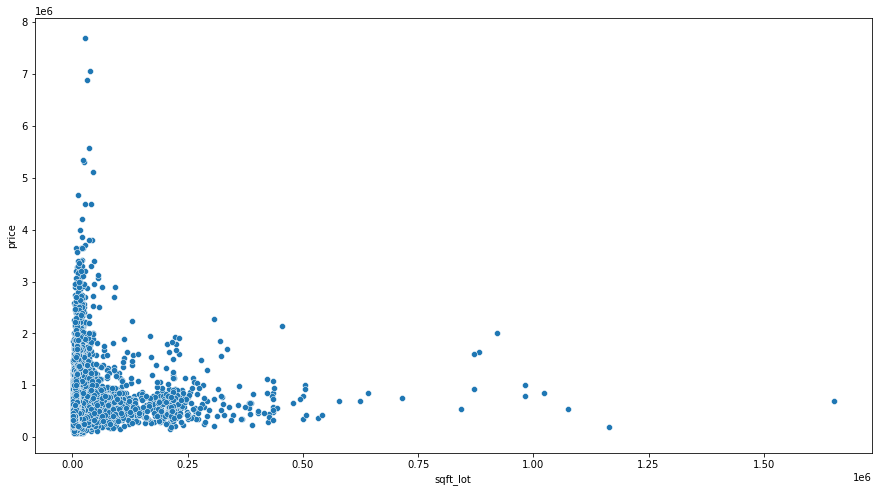

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = data,x='sqft_lot',y = 'price')

## 4. Preparing the results log, and the function that will execute the model every time.
We start by creating a dataframe that will store the results of the tests, the test size we used, and a comment that will describe the wrangling steps that led us to this outcome. This way we can track easily the wrangling steps we went through, and we can learn what helps the model, and what is detrimental to its performance.  

In [18]:
#Create and reset the log with this cell
reg_log = pd.DataFrame(columns = ['r2','adj_r2','mse','rmse','test_size','comment'])

In [19]:
def apply_linear_regression(X,y,testsize = 0.4,comment = "No comment added"):
    """
    This function will be used to apply a linear regression, log and print the results, the comments, and 
    save them in the log dataframe. Will return the same list logged in the dataframe. 
    A log pandas dataframe will have to be created beforehand executing this script:
    reg_log = pd.DataFrame(columns = ['r2','adj_r2','mse','rmse','comment'])
        
    """
    
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    
    #Train test split, we can change the test size with the input, 40% will be default
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=100)
    
    #Assigning the model we will use, applying it and calculating test predictions 
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train,y_train)
    predictions  = lm.predict(X_test)
    
    #Calculating and printing the test indicators
    r2 = r2_score(y_test, predictions)
    print( "r2 Score:   "+ str(r2))
    
    n = len(X_test) 
    p = X_test.shape[1]
    adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
    print("Adj. r2 Score:    "+str(adj_r2))
    
    mse = mean_squared_error(y_test, predictions)
    print("MSE Score:  "+ str(mse))
    
    rmse = mse**(1/2)
    print("RMSE Score: "+ str(rmse))
    
    print("Comment:", comment)
    print("Test size:", int(testsize*100), "%")
    
    global reg_log
    
    log_inp = [r2,adj_r2,mse,rmse,testsize,comment]
    
    reg_log.loc[len(reg_log)+1] = log_inp


Here we prepared a function that plots our progress over each attempt, so we can keep track of our outcome better:

In [20]:
#This will plot my progress of r2 and the mean squared error over each trial of optimization. 
def plot_log_show():
    plt.figure(figsize=(15,5))
    sns.lineplot(data=reg_log.r2, color="b")
    ax2 = plt.twinx()
    plot = sns.lineplot(data=reg_log.mse, color="r", ax=ax2)
    plot.set_title('r2 (blue) and mse (red) over number of attempts');

## Pre processing
Now that we have our tools to apply the model, we will start transforming the data, applying the model and testing it at each step, in order to gain knowledge over if our steps actually are beneficial or detrimental to the linear model.

Let's check for multicollinearity and see if we should drop certain columns in the first place:

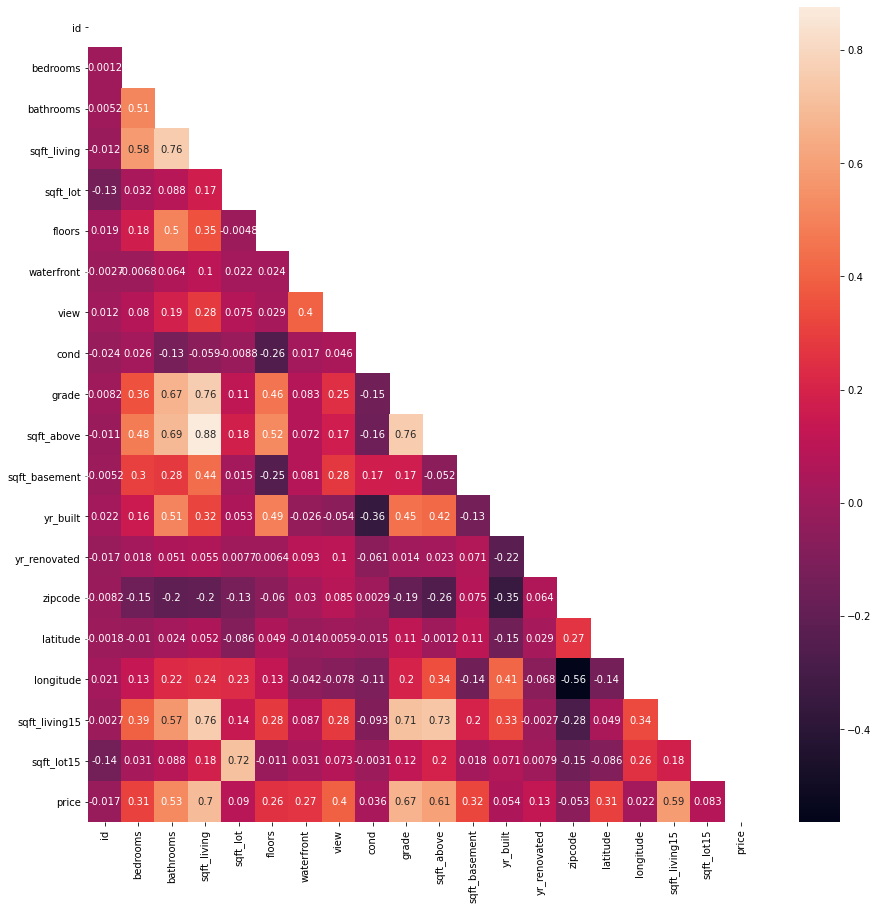

In [21]:
 def corr_matr_show(data):
    correlations_matrix = data.corr()
    mask = np.zeros_like(correlations_matrix)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
    plt.show()
    
corr_matr_show(data)

The only measure I would touch later is sqft_above/sqft_living, as the correlation is very high.  We will start by creating the first log, by applying the model roughly and create a baseline with which we can compare our results.

In [22]:
#minmaxscaler for the date
def minmax_apply(date_series):
    from sklearn.preprocessing import minmax_scale 
    dates = minmax_scale(date_series)
    return pd.DataFrame(dates.reshape(-1,1))

#StandardScaler for the numerical values, we input a dataframe and itll return it normalised
def stscaler_apply(X_pre):
    from sklearn.preprocessing import StandardScaler
    transformer = StandardScaler().fit(X_pre)
    return pd.DataFrame(transformer.transform(X_pre))

#OneHotEncoder for categorical data, used later.
def onehot_apply(data):
    from sklearn import preprocessing
    le= preprocessing.LabelEncoder()
    data_2 = data.apply(le.fit_transform)
    
    enc = preprocessing.OneHotEncoder()
    enc.fit(data_2)
    onehotlabels = enc.transform(data_2).toarray()
    return pd.DataFrame(onehotlabels)

In [23]:
#we copy the original data to make a wrangling copy, so we can always recall originals when needed. 
datawr = pd.DataFrame(data)

#And we can start dropping id, date and price_sold
datawr.drop(['id','date_sold','price'],axis =1, inplace = True)

#We deal with dates separately, as we use another scaler. 
dates = minmax_apply(data['date_sold'])
#And we apply scaler to numericals:
X_stand = stscaler_apply(datawr)

X = pd.concat((dates,X_stand), axis = 1)
y = data['price']

**1st run**

In [24]:
apply_linear_regression(X,y,.4,"First log, minmaxscaler for date, standardscaler for all numericals, drop id")

r2 Score:   0.6956465146547524
Adj. r2 Score:    0.6949755880714411
MSE Score:  44169055689.44129
RMSE Score: 210164.353993348
Comment: First log, minmaxscaler for date, standardscaler for all numericals, drop id
Test size: 40 %


* For the first transformation we saw that sqft_living = sqft_above + sqft_below, in every case. We proved it this way, by counting the number of rows where this doesn't happen

In [25]:
sum(data['sqft_living'] != (data['sqft_above']+data['sqft_basement']))

0

We will then make a new row consisting of how much percentage of the living space corresponds to basement space,instead of having both living and above space in the dataset:

In [26]:
datawr['percent_basement'] = datawr['sqft_basement'] / datawr['sqft_living']
#and we drop the original columns
datawr.drop(['sqft_basement','sqft_above'], axis = 1, inplace = True)

We can see in the new correlation matrix that we broke that multicollinearity, but we still kept the information about basement sizes

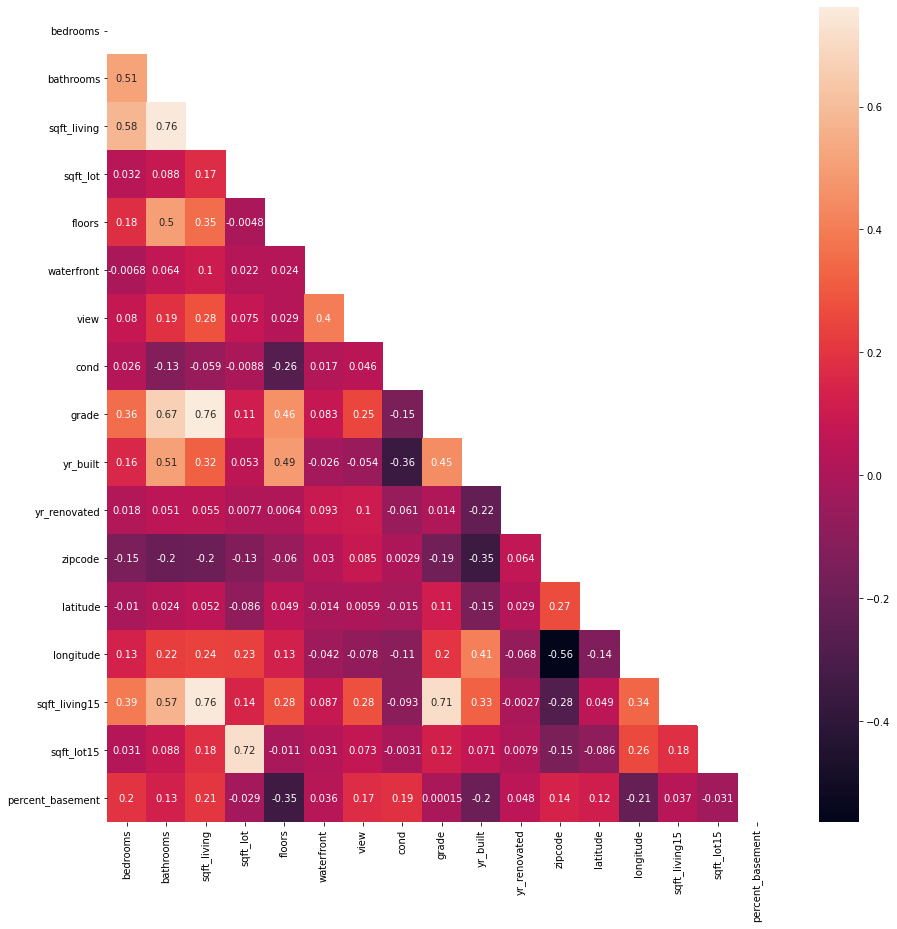

In [27]:
corr_matr_show(datawr)

In [28]:
#We pass the scaler again to our numerical values in order to apply the model again 
X_stand = stscaler_apply(datawr)

X = pd.concat((dates,X_stand), axis = 1)
y = data['price']

**2nd run** 

In [29]:
apply_linear_regression(X,y,.4,"Removed multicollinearity sqft_above with sqft_living, created %basement")

r2 Score:   0.6985570901524953
Adj. r2 Score:    0.6979276269996815
MSE Score:  43746660752.50702
RMSE Score: 209157.02415292445
Comment: Removed multicollinearity sqft_above with sqft_living, created %basement
Test size: 40 %


We can see an improvement in both scores, r2 is slightly better, but the mse score has dropped slightly 

* We can change the last refurbished year to years since last renovation, to make it more measurable. We will assume it is 2016

In [30]:
datawr['yr_since_last_ren'] = [2016-x if x!=0 else 2016-data.loc[i,'yr_built'] for i,x in enumerate(data['yr_renovated'])]

And we can also drop the orignal columns, keeping the information

In [31]:
datawr.drop(['yr_renovated'],axis =1, inplace = True)

In [32]:
X_stand = stscaler_apply(datawr)

X = pd.concat((dates,X_stand), axis = 1)
y = data['price']

**3rd run** 

In [33]:
apply_linear_regression(X,y,.4,"Added yr_since_last_ren, that measures how new the house is, and dropped original columns")

r2 Score:   0.6983693853502171
Adj. r2 Score:    0.6977395302384194
MSE Score:  43773901261.5342
RMSE Score: 209222.13377540675
Comment: Added yr_since_last_ren, that measures how new the house is, and dropped original columns
Test size: 40 %


We can turn the year built, also in a more scalable measure by substracting it to the current year:

In [34]:
datawr['yr_since_built'] = 2016 - datawr['yr_built']

And drop the original column:

In [35]:
datawr.drop(['yr_built'],axis =1, inplace = True)

In [36]:
X_stand = stscaler_apply(datawr)

X = pd.concat((dates,X_stand), axis = 1)
y = data['price']

**4th run** 

In [37]:
apply_linear_regression(X,y,.4,"Added yr_since_built and dropped the original year")

r2 Score:   0.6983693853502171
Adj. r2 Score:    0.6977395302384194
MSE Score:  43773901261.5342
RMSE Score: 209222.13377540675
Comment: Added yr_since_built and dropped the original year
Test size: 40 %


this created some collinearity and did not improve the result, so we will find another way to input the year built. we will scale the original year column with minmaxscaler instead.

In [38]:
built_year = pd.to_datetime(data['yr_built']) 
built_year = minmax_apply(built_year)


In [39]:
datawr.drop(['yr_since_built'],axis =1, inplace = True)

In [40]:
X_stand = stscaler_apply(datawr)

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = data['price']

**5th run** 

In [41]:
apply_linear_regression(X,y,.4,"used minmaxscaler for built year, dropped yr_since_built")

r2 Score:   0.6983693853502171
Adj. r2 Score:    0.6977395302384194
MSE Score:  43773901261.53422
RMSE Score: 209222.1337754068
Comment: used minmaxscaler for built year, dropped yr_since_built
Test size: 40 %


Not a lot of change here. 
* Now we will try to remove the sqft_living and sqft_lot, but we will choose the old size for prices of sales done before 2015, and use sqft_living15 and sqft_living15 for those sales done in 2015.

In [42]:
datawr['sqft_living_sale'] = np.where(data['date_sold']>=datetime.datetime(2015,1,1), 
                                      data['sqft_living15'],data['sqft_living'])

datawr['sqft_lot_sale'] = np.where(data['date_sold']>=datetime.datetime(2015,1,1), 
                                      data['sqft_lot15'],data['sqft_lot'])


And drop the original columns. As we have no information about if the basement sizes were changed, we will leave the percentage we calculated before.

In [43]:
datawr.drop(['sqft_living','sqft_lot','sqft_living15','sqft_lot15'],axis = 1,inplace = True)

In [44]:
X_stand = stscaler_apply(datawr)

X = pd.concat((dates,built_year,X_stand), axis = 1)
y = data['price']

**6th run** 

In [45]:
apply_linear_regression(X,y,.4,"selected the sqft columns depending on sale year")

r2 Score:   0.6827175591337735
Adj. r2 Score:    0.6821287724191064
MSE Score:  46045359999.755455
RMSE Score: 214581.8258841029
Comment: selected the sqft columns depending on sale year
Test size: 40 %


* We try now to drop latitude and longitude, and turn the zip codes into state codes. for that we need to import a zipcode database, and join it to our original data. We can also use this data for our tableau visualization later.  

In [46]:
zipc = pd.read_csv('zip_code_database.csv')

In [47]:
zipc = zipc[['zip','state','primary_city','irs_estimated_population_2015']]
zipc.rename(columns= {'zip':'zipcode'},inplace = True)

In [48]:
datawr = pd.merge(datawr, zipc, on='zipcode',how='left')

In [49]:
datawr['state'].value_counts()

WA    21597
Name: state, dtype: int64

In [50]:
datawr['primary_city'].value_counts()

Seattle          8973
Renton           1597
Bellevue         1407
Kent             1201
Kirkland          977
Redmond           977
Auburn            911
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      589
Woodinville       471
Snoqualmie        308
Kenmore           283
Mercer Island     282
Enumclaw          233
North Bend        220
Bothell           195
Duvall            190
Carnation         124
Vashon            117
Black Diamond     100
Fall City          80
Medina             50
Name: primary_city, dtype: int64

All sales data correspond to Washington state, so we will drop the state column, as well as latitude, logitude, and the zip codes, and we will start encoding categorical data, starting by the city.

* Creating Categorical data:

In [51]:
datawr.drop(['zipcode','state','latitude','longitude','zipcode'], axis =1,inplace = True)

In [52]:
datawr.dtypes

bedrooms                           int64
bathrooms                        float64
floors                           float64
waterfront                         int64
view                               int64
cond                               int64
grade                              int64
percent_basement                 float64
yr_since_last_ren                  int64
sqft_living_sale                   int64
sqft_lot_sale                      int64
primary_city                      object
irs_estimated_population_2015      int64
dtype: object

We will quickly use get_dummies for the primary city column, and evaluate the change in our model.

In [53]:
datawr_cat = pd.get_dummies(datawr['primary_city'])
datawr_num = datawr.select_dtypes('number')

In [54]:
X_stand = stscaler_apply(datawr_num)

X = pd.concat((dates,built_year,X_stand,datawr_cat), axis = 1)
y = data['price']

**7th run** 

In [55]:
apply_linear_regression(X,y,.4,"added city categorical data and population, dropped location columns")

r2 Score:   0.712600672646605
Adj. r2 Score:    0.7113307686420203
MSE Score:  41708597095.84164
RMSE Score: 204226.8275615171
Comment: added city categorical data and population, dropped location columns
Test size: 40 %


this time we managed to increase R2 in 3%, reducing the median square error, let's turn more rows into categoricals, starting by the waterfront column, together with the number of floors. 

In [56]:
datawr_cat = datawr[['primary_city', 'waterfront','floors']]
datawr_num = datawr.drop(['primary_city', 'waterfront','floors','irs_estimated_population_2015'], axis = 1)

In [57]:
datawr_cat =onehot_apply(datawr_cat)

In [58]:
X_stand = stscaler_apply(datawr_num)

X = pd.concat((dates,built_year,X_stand,datawr_cat), axis = 1)
y = data['price']

**8th run** 

In [59]:
apply_linear_regression(X,y,.4,"turned city, waterfront and floors into categorical data")

r2 Score:   0.7144278306802003
Adj. r2 Score:    0.7129991391990192
MSE Score:  41443432250.274864
RMSE Score: 203576.60044876195
Comment: turned city, waterfront and floors into categorical data
Test size: 40 %


In [60]:
datawr_num

,bedrooms,bathrooms,view,cond,grade,percent_basement,yr_since_last_ren,sqft_living_sale,sqft_lot_sale
0,3,1.00,0,3,7,0.000000,61,1180,5650
1,3,2.25,0,3,7,0.155642,25,2570,7242
2,2,1.00,0,3,6,0.000000,83,2720,8062
3,4,3.00,0,5,7,0.464286,51,1960,5000
4,3,2.00,0,3,8,0.000000,29,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,0,3,8,0.000000,7,1530,1131
21593,4,2.50,0,3,8,0.000000,2,1830,7200
21594,2,0.75,0,3,7,0.000000,7,1020,1350
21595,3,2.50,0,3,8,0.000000,12,1410,1287


In [61]:
datawr_num.shape

(21597, 9)

In [62]:
datawr

,bedrooms,bathrooms,floors,waterfront,view,cond,grade,percent_basement,yr_since_last_ren,sqft_living_sale,sqft_lot_sale,primary_city,irs_estimated_population_2015
0,3,1.00,1.0,0,0,3,7,0.000000,61,1180,5650,Seattle,23750
1,3,2.25,2.0,0,0,3,7,0.155642,25,2570,7242,Seattle,35640
2,2,1.00,1.0,0,0,3,6,0.000000,83,2720,8062,Kenmore,21650
3,4,3.00,1.0,0,0,5,7,0.464286,51,1960,5000,Seattle,14980
4,3,2.00,1.0,0,0,3,8,0.000000,29,1800,7503,Sammamish,28270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,0.000000,7,1530,1131,Seattle,44790
21593,4,2.50,2.0,0,0,3,8,0.000000,2,1830,7200,Seattle,26750
21594,2,0.75,2.0,0,0,3,7,0.000000,7,1020,1350,Seattle,26310
21595,3,2.50,2.0,0,0,3,8,0.000000,12,1410,1287,Issaquah,26770


In [63]:
reg_log

,r2,adj_r2,mse,rmse,test_size,comment
1,0.695647,0.694976,4.416906e+10,210164.353993,0.4,"First log, minmaxscaler for date, standardscal..."
2,0.698557,0.697928,4.374666e+10,209157.024153,0.4,Removed multicollinearity sqft_above with sqft...
3,0.698369,0.697740,4.377390e+10,209222.133775,0.4,"Added yr_since_last_ren, that measures how new..."
4,0.698369,0.697740,4.377390e+10,209222.133775,0.4,Added yr_since_built and dropped the original ...
5,0.698369,0.697740,4.377390e+10,209222.133775,0.4,"used minmaxscaler for built year, dropped yr_s..."
6,0.682718,0.682129,4.604536e+10,214581.825884,0.4,selected the sqft columns depending on sale year
7,0.712601,0.711331,4.170860e+10,204226.827562,0.4,"added city categorical data and population, dr..."
8,0.714428,0.712999,4.144343e+10,203576.600449,0.4,"turned city, waterfront and floors into catego..."


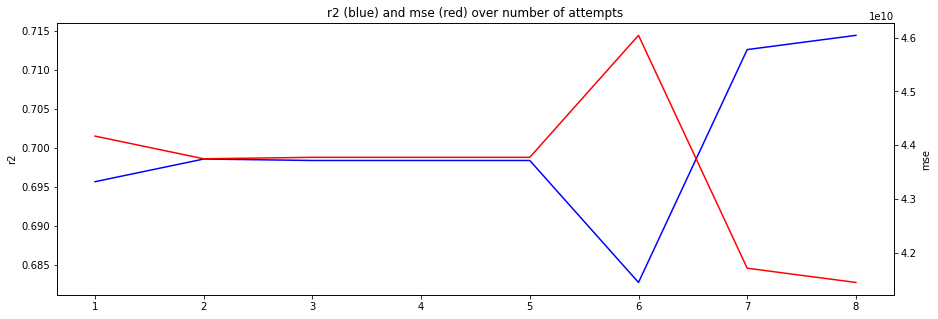

In [64]:
plot_log_show()

In [65]:
datawr

,bedrooms,bathrooms,floors,waterfront,view,cond,grade,percent_basement,yr_since_last_ren,sqft_living_sale,sqft_lot_sale,primary_city,irs_estimated_population_2015
0,3,1.00,1.0,0,0,3,7,0.000000,61,1180,5650,Seattle,23750
1,3,2.25,2.0,0,0,3,7,0.155642,25,2570,7242,Seattle,35640
2,2,1.00,1.0,0,0,3,6,0.000000,83,2720,8062,Kenmore,21650
3,4,3.00,1.0,0,0,5,7,0.464286,51,1960,5000,Seattle,14980
4,3,2.00,1.0,0,0,3,8,0.000000,29,1800,7503,Sammamish,28270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,0.000000,7,1530,1131,Seattle,44790
21593,4,2.50,2.0,0,0,3,8,0.000000,2,1830,7200,Seattle,26750
21594,2,0.75,2.0,0,0,3,7,0.000000,7,1020,1350,Seattle,26310
21595,3,2.50,2.0,0,0,3,8,0.000000,12,1410,1287,Issaquah,26770


array([[<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'8'}>]], dtype=object)

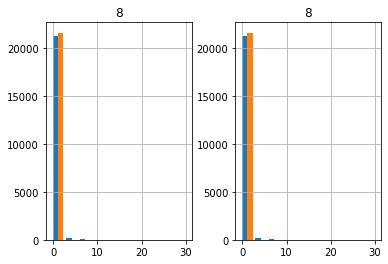

In [66]:
X[8].hist()